## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [244]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import pickle

# pickle file locations
training_file = 'train.p'
testing_file = 'test.p'

# load pickle data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))



Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

30


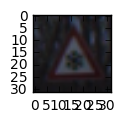

In [245]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

# def grayscale(img):
#     """Applies the Grayscale transform
#     This will return an image with only one color channel
#     but NOTE: to see the returned image as grayscale
#     you should call plt.imshow(gray, cmap='gray')"""
#     return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# def canny(img, low_threshold, high_threshold):
#     """Applies the Canny transform"""
#     return cv2.Canny(img, low_threshold, high_threshold)

# %matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

# plt.figure(figsize=(1,1))
# plt.imshow(edges)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [246]:
from sklearn.utils import shuffle
# def add_canny(image):
#     # Define our parameters for Canny and apply
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     low_threshold = 50
#     high_threshold = 150
#     edges = canny(gray_image, low_threshold, high_threshold) 
#     return np.concatenate((image,np.array([edges]).T),2)

# # add canny lines channel
# X_train = np.array([add_canny(image) for image in X_train])
# X_validation = np.array([add_canny(image) for image in X_validation])
# X_test = np.array([add_canny(image) for image in X_test])
# print(X_test.shape)

# shuffle input data
X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [247]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [248]:
from tensorflow.contrib.layers import flatten
input_depth = 3; # rgb
output_depth =43; #43 traffic signs

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def fully_connected(x,W,b):
    x = tf.add(
    tf.matmul(x, W),
    b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')


def LeNet_modified(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer Depths
    layer_depth = {
        'input':input_depth, 
        'layer_1': 6,
        'layer_2': 24, #Original Lenet is 16
        'fully_connected_1': 120,
        'fully_connected_2': 84,
        'output_layer': output_depth,
    }
    
    # weight matrix sizes
    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            [5, 5, layer_depth['input'], layer_depth['layer_1']], mean = mu, stddev = sigma)), 
        'layer_2': tf.Variable(tf.truncated_normal(
            [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal(
            [5*5*layer_depth['layer_2'], layer_depth['fully_connected_1']], mean = mu, stddev = sigma)),
        'fully_connected_2': tf.Variable(tf.truncated_normal(
            [layer_depth['fully_connected_1'], layer_depth['fully_connected_2']], mean = mu, stddev = sigma)),
        'output_layer': tf.Variable(tf.truncated_normal(
            [layer_depth['fully_connected_2'], layer_depth['output_layer']], mean = mu, stddev = sigma))
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
        'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
        'output_layer': tf.Variable(tf.zeros(layer_depth['output_layer']))
    }
    
    #first compute canny lines 
    # Define our parameters for Canny and apply
    #low_threshold = 50
    #high_threshold = 150
    #edges = canny(blur_gray, low_threshold, high_threshold) 
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.  
    x = conv2d(x, weights['layer_1'], biases['layer_1'], strides=1)
    # Activation.
    x = tf.nn.relu(x)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = maxpool2d(x)
        
    # Layer 2: Convolutional. Output = 10x10x16.
    x = conv2d(x, weights['layer_2'], biases['layer_2'], strides=1)    
    # Activation.
    x = tf.nn.relu(x)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = maxpool2d(x)

    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    
    x = fully_connected(x, weights['fully_connected_1'], biases['fully_connected_1'])
    # Activation.
    x = tf.nn.relu(x)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    x = fully_connected(x, weights['fully_connected_2'], biases['fully_connected_2'])  
    # Activation.
    x = tf.nn.relu(x)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = fully_connected(x, weights['output_layer'], biases['output_layer'])  
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [249]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, output_depth)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [250]:
rate = 0.001

logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [251]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [252]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.713

EPOCH 2 ...
Validation Accuracy = 0.841

EPOCH 3 ...
Validation Accuracy = 0.908

EPOCH 4 ...
Validation Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.935

EPOCH 6 ...
Validation Accuracy = 0.948

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.950

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.957

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))